In [1]:
import sys
sys.path.append('..')

import VESIcal as v
import numpy as np
import scipy
import pandas as pd

In [2]:
basalts = v.ExcelFile("../testDataSets/cerro_negro.xlsx")

In [3]:
isobar_list = []
for index, row in basalts.data.iterrows():
    isobar_list.append(v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(sample=row.name), temperature=1200, pressure_list=[3000], isopleth_list=[0.5], print_status=True).result[0])

Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 3000 bars
Calculating isopleth at 

In [4]:
# print(isobar_list[-1])    

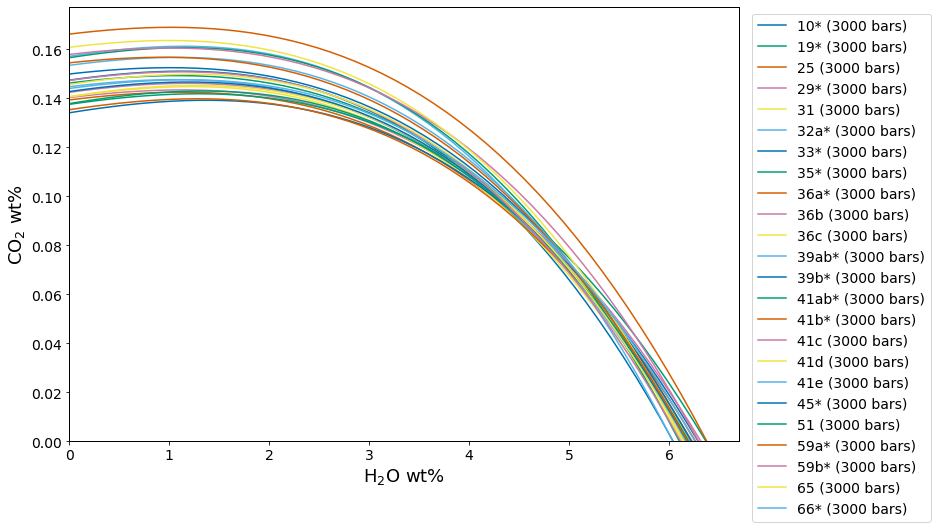

In [5]:
v.plot(isobars=[isobar for isobar in isobar_list], isobar_labels=[row.name for index, row in basalts.data.iterrows()])

In [6]:
#calculate area under each curve
areas = []
samples = [row.name for index, row in basalts.data.iterrows()]
for isobar in isobar_list:
    x_vals = np.array([row["H2O_liq"] for index, row in isobar.iterrows()])
    y_vals = np.array([row["CO2_liq"] for index, row in isobar.iterrows()])
    area_under_the_curve = scipy.integrate.simps(y_vals, x_vals)
    areas.append(area_under_the_curve)

In [7]:
#Get maximum and minimum areas
area_dict = dict(zip(samples, areas))
max_sample = max(area_dict, key=area_dict.get)
min_sample = min(area_dict, key=area_dict.get)

In [8]:
#Calculate the average composition of the entire dataset
columns = list(basalts.data)
avg_vals = []
for col in columns:
    try:
        avg_vals.append(basalts.data[col].mean())
    except:
        avg_vals.append("AVG")

avg_dict = dict(zip(columns, avg_vals))
avg_dict = v.get_oxides(avg_dict)

In [9]:
#Now, calculate isobars for the max and min samples at multiple pressures
max_isobars, max_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(max_sample), temperature=1200, pressure_list=[500], isopleth_list=[], print_status=True).result
min_isobars, min_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(min_sample), temperature=1200, pressure_list=[500], isopleth_list=[], print_status=True).result

#Calculate isobars for the average composition
avg_isobars, avg_isopleths = v.calculate_isobars_and_isopleths(sample=avg_dict, temperature=1200, pressure_list=[500], isopleth_list=[], print_status=True).result

Calculating isobar at 500 bars
Calculating isopleth at 0
Calculating isopleth at 1
Done!
Calculating isobar at 500 bars
Calculating isopleth at 0
Calculating isopleth at 1
Done!
Calculating isobar at 500 bars
Calculating isopleth at 0
Calculating isopleth at 1
Done!


In [10]:
#Now, calculate isobars for the max and min samples at multiple pressures
max_isobars, max_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(max_sample), temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result
min_isobars, min_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(min_sample), temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result

#Calculate isobars for the average composition
avg_isobars, avg_isopleths = v.calculate_isobars_and_isopleths(sample=avg_dict, temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result

Calculating isobar at 500 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 1000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 2000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 4000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 500 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 1000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 2000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 3000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating is

In [11]:
#Make dataset with all data except for max and min values
other_data = basalts.data.drop([max_sample, min_sample])

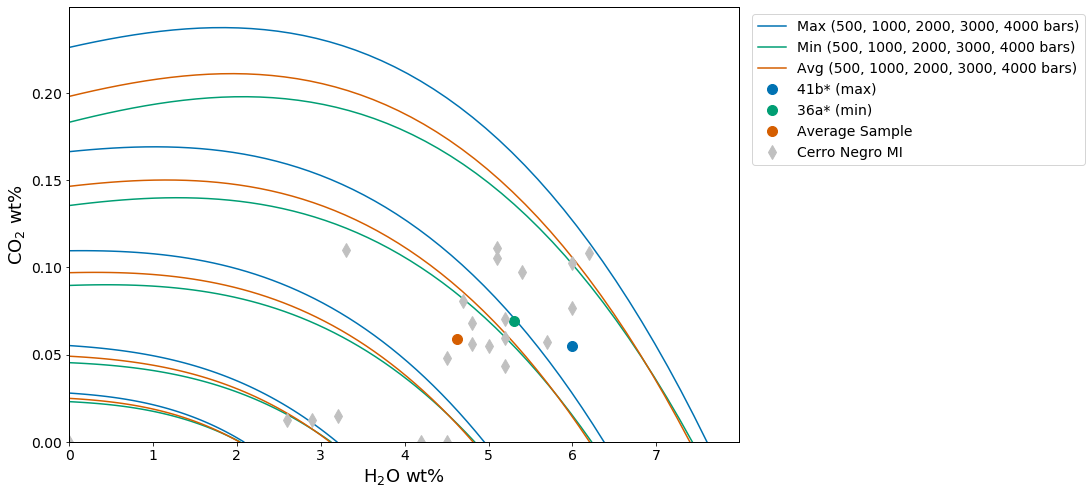

In [12]:
#set up what to pass to v.plot
isobars = [max_isobars, 
           min_isobars, 
           avg_isobars]

isobar_labels = ["Max", 
                 "Min", 
                 "Avg"]

custom_H2O=[basalts.get_sample_oxide_comp(max_sample)["H2O"], 
            basalts.get_sample_oxide_comp(min_sample)["H2O"], 
            avg_dict["H2O"], 
            other_data["H2O"]]

custom_CO2=[basalts.get_sample_oxide_comp(max_sample)["CO2"], 
            basalts.get_sample_oxide_comp(min_sample)["CO2"], 
            avg_dict["CO2"], 
            other_data["CO2"]]

custom_labels = [str(max_sample) + " (max)", 
                 str(min_sample) + " (min)", 
                 "Average Sample", 
                 "Cerro Negro MI"]

custom_colors = [v.color_list[0], 
                 v.color_list[1], 
                 v.color_list[2],
                 'silver']

custom_symbols = ['o',
                  'o',
                  'o',
                  'd']

v.plot(isobars=isobars, isobar_labels=isobar_labels, 
       custom_H2O=custom_H2O, 
       custom_CO2=custom_CO2, 
       custom_labels=custom_labels,
       custom_colors=custom_colors,
       custom_symbols=custom_symbols)




3


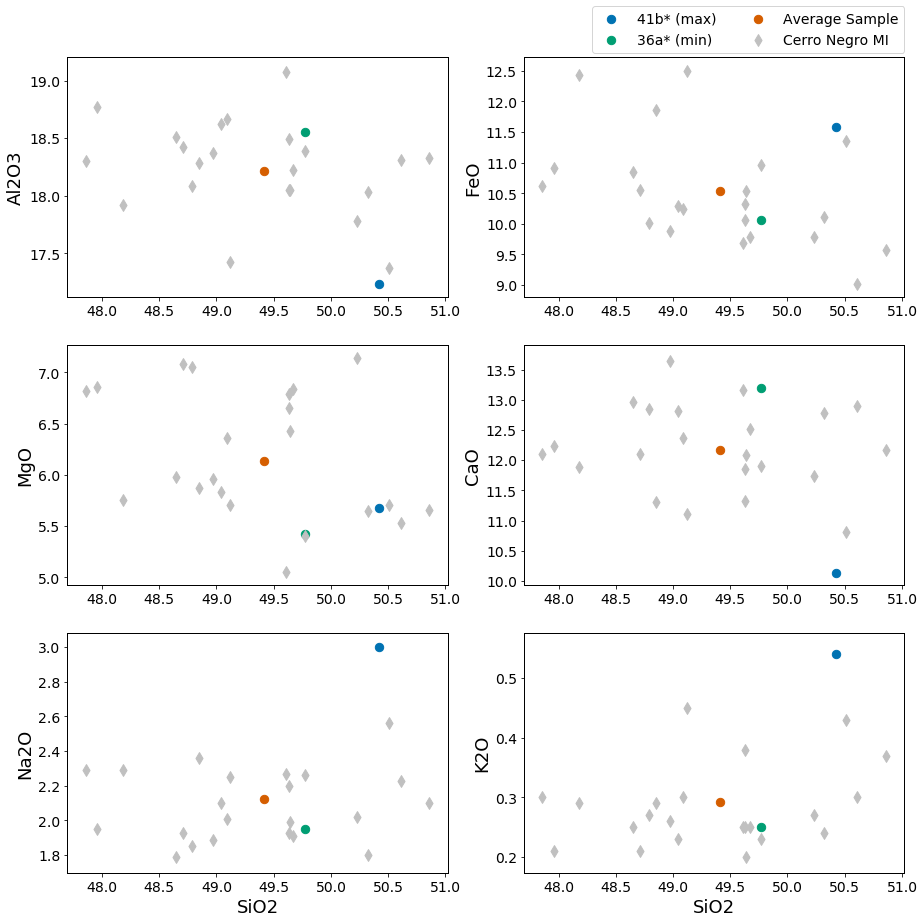

In [13]:
import matplotlib.pyplot as plt

other_oxides = ["Al2O3", "FeO", "MgO", "CaO", "Na2O", "K2O"]
my_samples = [basalts.get_sample_oxide_comp(max_sample),
              basalts.get_sample_oxide_comp(min_sample),
             avg_dict,
             other_data]

fig, axs = plt.subplots(3,2, figsize = (15,15))
print(len(axs))

for j in range(len(my_samples)):
    axs[0][0].scatter(my_samples[j]["SiO2"], my_samples[j]["Al2O3"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0][0].set_ylabel("Al2O3")
    axs[0][1].scatter(my_samples[j]["SiO2"], my_samples[j]["FeO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0][1].set_ylabel("FeO")
    axs[1][0].scatter(my_samples[j]["SiO2"], my_samples[j]["MgO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1][0].set_ylabel("MgO")
    axs[1][1].scatter(my_samples[j]["SiO2"], my_samples[j]["CaO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1][1].set_ylabel("CaO")
    axs[2][0].scatter(my_samples[j]["SiO2"], my_samples[j]["Na2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2][0].set_ylabel("Na2O")
    axs[2][0].set_xlabel("SiO2")
    axs[2][1].scatter(my_samples[j]["SiO2"], my_samples[j]["K2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2][1].set_ylabel("K2O")
    axs[2][1].set_xlabel("SiO2")
    
axs[0][1].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2, borderaxespad=0.)

# Alternative plots

In [14]:
#Calculate Saturation Pressure for all samples
other_data = v.ExcelFile(filename=None, dataframe=other_data)
satP_other = other_data.calculate_saturation_pressure(temperature=1200)
satP_max = v.calculate_saturation_pressure(sample=basalts.get_sample_oxide_comp(max_sample), temperature=1200)
satP_min = v.calculate_saturation_pressure(sample=basalts.get_sample_oxide_comp(min_sample), temperature=1200)
satP_avg = v.calculate_saturation_pressure(sample=avg_dict, temperature=1200)

Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample 29*
Calculating sample 31
Calculating sample 32a*
Calculating sample 33*
Calculating sample 35*
Calculating sample 36b
Calculating sample 36c
Calculating sample 39ab*
Calculating sample 39b*
Calculating sample 41ab*
Calculating sample 41c
Calculating sample 41d
Calculating sample 41e
Calculating sample 45*
Calculating sample 51
Calculating sample 59a*
Calculating sample 59b*
Calculating sample 65
Calculating sample 66*
Done!


In [15]:
#testing
test_file = v.ExcelFile(dataframe=other_data)

TypeError: __init__() missing 1 required positional argument: 'filename'